# Task 6: K-Nearest Neighbors (KNN) Classification


## Required library installation

In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


##  Load and Normalize Data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train KNN for Different K Values

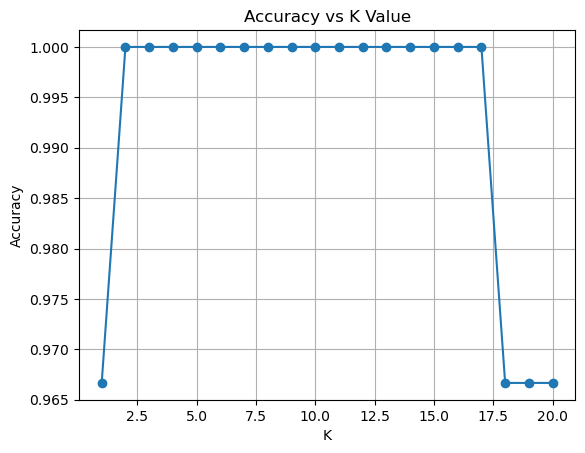

Best K: 2


In [29]:
accuracies = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best K
best_k = k_range[np.argmax(accuracies)]
print("Best K:", best_k)


##  Evaluate the Best Model

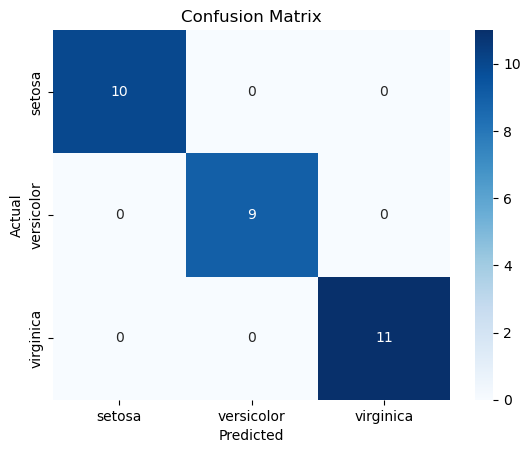

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
# Train best model
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


## Hyperparameter Tuning (K + Distance Metric)

In [35]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters from Grid Search: {'metric': 'manhattan', 'n_neighbors': 8}
Best Cross-Validation Score: 0.9583333333333334


## Decision Boundary (Using Only 2 Features)

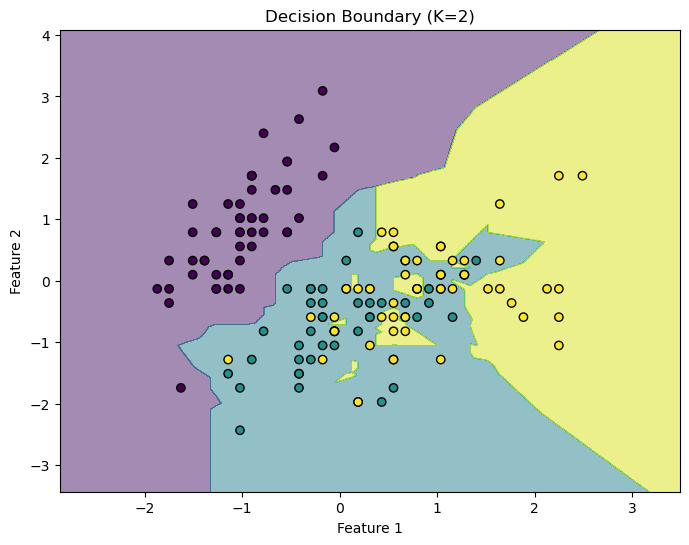

In [38]:
# Use only first two features for 2D visualization
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Fit model
model_2d = KNeighborsClassifier(n_neighbors=best_k)
model_2d.fit(X_train_2d, y_train_2d)

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k')
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Compare with Another Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 1.0


##  Try KNN on Another Dataset (e.g., Wine Dataset)

In [44]:
from sklearn.datasets import load_wine

# Load and prepare dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=42)

knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_wine, y_train_wine)
y_pred_wine = knn_wine.predict(X_test_wine)

print("Wine Dataset Accuracy:", accuracy_score(y_test_wine, y_pred_wine))


Wine Dataset Accuracy: 0.9444444444444444


## Visualize High-Dimensional Data using PCA

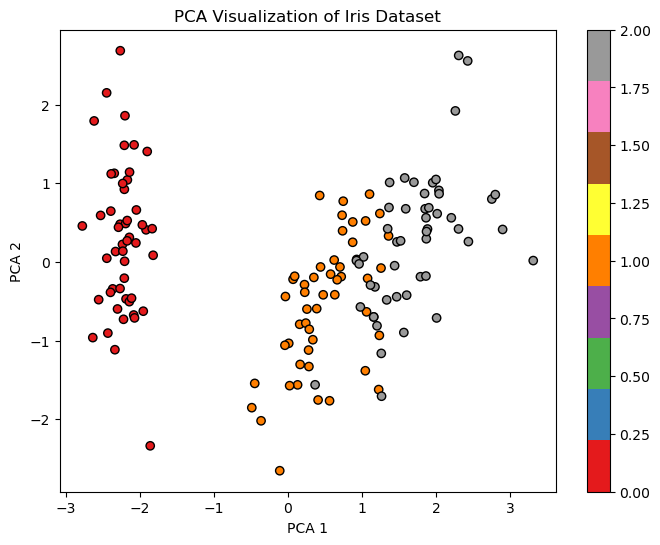

In [47]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


## Evaluate with Cross-Validation (instead of single train-test split)

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96666667 0.96666667 0.9        0.9        1.        ]
Mean CV Accuracy: 0.9466666666666667


##  Plot Confusion Matrix with Labels

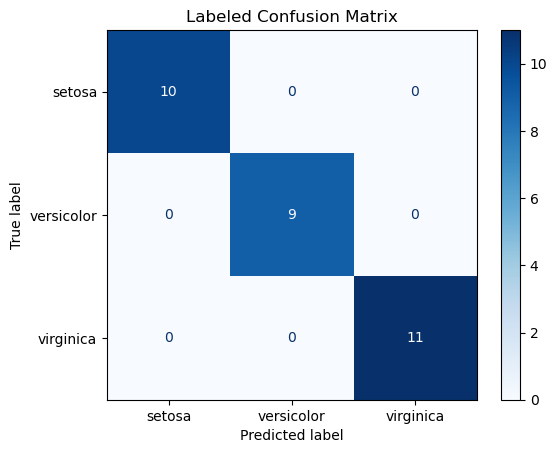

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=iris.target_names, cmap='Blues')
plt.title("Labeled Confusion Matrix")
plt.show()


## Compare Distance Metrics (Manhattan vs Euclidean)

In [58]:
for metric in ['euclidean', 'manhattan']:
    knn_metric = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_metric.fit(X_train, y_train)
    pred_metric = knn_metric.predict(X_test)
    acc_metric = accuracy_score(y_test, pred_metric)
    print(f"Accuracy with {metric} distance: {acc_metric}")


Accuracy with euclidean distance: 1.0
Accuracy with manhattan distance: 1.0
